<a href="https://colab.research.google.com/github/iamshant/fastbook/blob/master/02_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
# %ls
%cd /content/gdrive/My Drive/fastbook-master/
%ls

/content/gdrive/My Drive/fastbook-master
01_intro.ipynb           13_convolutions.ipynb  cat_breed/
02_production.ipynb      14_resnet.ipynb        clean/
03_ethics.ipynb          15_arch_details.ipynb  environment.yml
04_mnist_basics.ipynb    16_accel_sgd.ipynb     export.pkl
05_pet_breeds.ipynb      17_foundations.ipynb   images/
06_multicat.ipynb        18_CAM.ipynb           LICENSE
07_sizing_and_tta.ipynb  19_learner.ipynb       README_ko.md
08_collab.ipynb          20_conclusion.ipynb    README.md
09_tabular.ipynb         all_bears/             requirements.txt
10_nlp.ipynb             app_blog.ipynb         settings.ini
11_midlevel_data.ipynb   app_jupyter.ipynb      tools/
12_nlp_dive.ipynb        bears/                 utils.py


# From Model to Production

## The Practice of Deep Learning

### Starting Your Project

### The State of Deep Learning

#### Computer vision

#### Text (natural language processing)

#### Combining text and images

#### Tabular data

#### Recommendation systems

#### Other data types

### The Drivetrain Approach

## Gathering Data

# clean
To download images with Bing Image Search, sign up at Microsoft for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '24e81f472b0248ef9fd4c93ff6ef0e84')

In [ ]:
??search_images_bing

In [ ]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [ ]:
%ls

01_intro.ipynb           12_nlp_dive.ipynb      clean/
02_production.ipynb      13_convolutions.ipynb  environment.yml
03_ethics.ipynb          14_resnet.ipynb        images/
04_mnist_basics.ipynb    15_arch_details.ipynb  LICENSE
05_pet_breeds.ipynb      16_accel_sgd.ipynb     README_ko.md
06_multicat.ipynb        17_foundations.ipynb   README.md
07_sizing_and_tta.ipynb  18_CAM.ipynb           requirements.txt
08_collab.ipynb          19_learner.ipynb       settings.ini
09_tabular.ipynb         20_conclusion.ipynb    tools/
10_nlp.ipynb             app_blog.ipynb         utils.py
11_midlevel_data.ipynb   app_jupyter.ipynb


In [ ]:

#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [ ]:
# dest = '/content/gdrive/My Drive/fastbook-master/images/grizzly.jpg'
# /content/gdrive/My Drive/fastbook-master/images

# dest = 'images/grizzly.jpg'
# dest = 'images/grizzly.jpg'
# download_url(ims[0], dest)

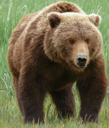

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
# bear_types = 'grizzly','Asiatic black','teddy', 'giant pandas', 'North American black', 'polar', 'sloth', 'spectacled', 'sun'
# path = Path('all_bears')

In [ ]:
cat_breed_1 = """Abyssinian
Aegean
Australian Mist
American Polydactyl
American Bobtail
American Curl
American Longhair
American Shorthair
American Wirehair
Asian Semi-longhair
Balinese
Bengal
Birman
Bombay
Brazilian Shorthair
British Shorthair
British Longhair
Burmese
Burmilla
California Spangled
Chantilly
Chartreux
Chausie
Cheetoh
Colorpoint Shorthair
Cornish Rex
Cymric
Devon Rex
Donskoy
Dragon Li
Egyptian Mau
European Shorthair
Exotic Shorthair
German Rex
Havana Brown
Himalayan
Japanese Bobtail
Javanese
Korat
Kurilian Bobtail
LaPerm
Maine Coon
Manx
Munchkin
Nebelung
Norwegian Forest
Ocicat
Ojos Azules
Oregon Rex
Oriental Bicolour
Oriental Shorthair
Oriental Longhair
Persian
Peterbald
Pixie-bob
Ragamuffin
Ragdoll
Russian Blue
Russian White
Savannah
Scottish Fold
Selkirk Rex
Serengeti
Siamese
Siberian
Singapura
Snowshoe
Sokoke
Somali
Sphynx
Sumxu
Thai
Tonkinese
Toyger
Turkish Angora
Turkish Van
Turkish Vankedisi
Twisty
Ukrainian Levkoy
Ussuri
York Chocolate"""

cat_breed_1 = cat_breed_1.split("\n")

path = Path("cat_breed")



# cat_breed = "Abyssinian Aegean cat Australian Mist American Polydactyl American Bobtail American Curl American Longhair American Shorthair American Wirehair Asian Semi-longhair Balinese Bengal Birman Bombay Brazilian Shorthair British Shorthair British Longhair Burmese Burmilla California Spangled Cat Chantilly/Tiffany Chartreux Chausie Cheetoh Colorpoint Shorthair Cornish Rex Cymric Devon Rex Donskoy or Don Sphynx Dragon Li Egyptian Mau European Shorthair Exotic Shorthair German Rex Havana Brown Himalayan/Colorpoint Persian Japanese Bobtail Javanese Korat Kurilian Bobtail LaPerm Maine Coon Manx Munchkin Nebelung Norwegian Forest Cat Ocicat Ojos Azules Oregon Rex Oriental Bicolour Oriental Shorthair Oriental Longhair Persian Peterbald Pixie-bob Ragamuffin Ragdoll Russian Blue Russian White, Black and Tabby Savannah Scottish Fold Selkirk Rex Serengeti cat Siamese Siberian Singapura Snowshoe Sokoke Somali Sphynx Sumxu Thai/Old-style Siamese Tonkinese Toyger Turkish Angora Turkish Van Turkish Vankedisi Twisty Cat/Squitten Ukrainian Levkoy Ussuri York Chocolate Cat"



# cat_breed = ""
# cat_breed = cat_breed.join(cat_breed_1)
# len(cat_breed_1)
# cat_breed

# for i in range(len(cat_breed_1)):
#   print(cat_breed_1[i])  
# help(split)

In [ ]:
# if not path.exists():
#     path.mkdir()
#     for o in bear_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} bear')
#         download_images(dest, urls=results.attrgot('content_url'))

if not path.exists():
    path.mkdir()
    for o in range(len(cat_breed_1)):
        dest = (path/cat_breed_1[o])
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{cat_breed_1[o]} cat')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
fns

(#11937) [Path('cat_breed/Abyssinian/00000006.jpg'),Path('cat_breed/Abyssinian/00000002.jpg'),Path('cat_breed/Abyssinian/00000004.jpg'),Path('cat_breed/Abyssinian/00000003.jpg'),Path('cat_breed/Abyssinian/00000000.jpg'),Path('cat_breed/Abyssinian/00000005.png'),Path('cat_breed/Abyssinian/00000010.jpg'),Path('cat_breed/Abyssinian/00000011.jpg'),Path('cat_breed/Abyssinian/00000012.jpg'),Path('cat_breed/Abyssinian/00000008.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


(#0) []

In [ ]:
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

### End sidebar

## From Data to DataLoaders

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

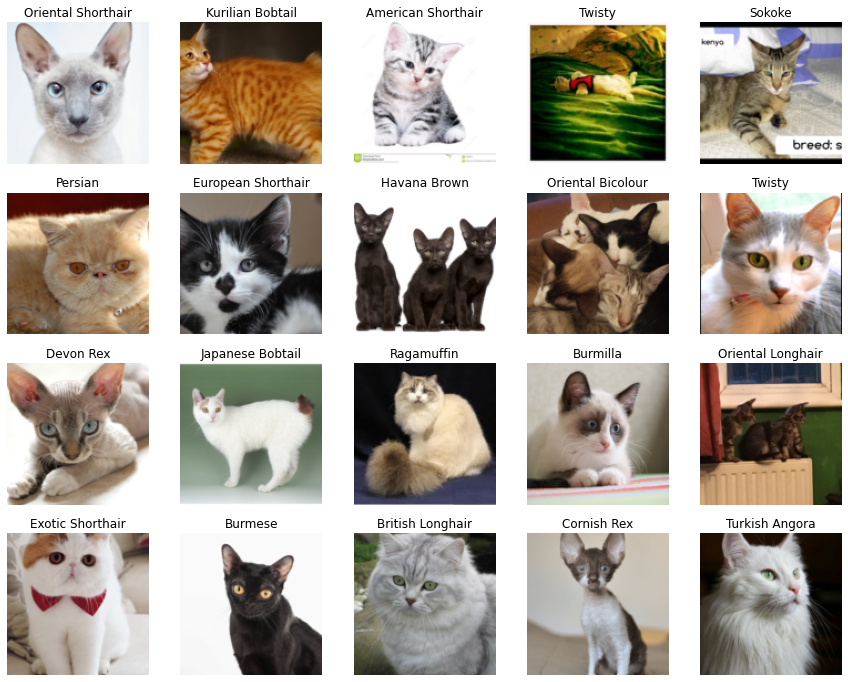

In [ ]:
dls.valid.show_batch(max_n=20, nrows=4)

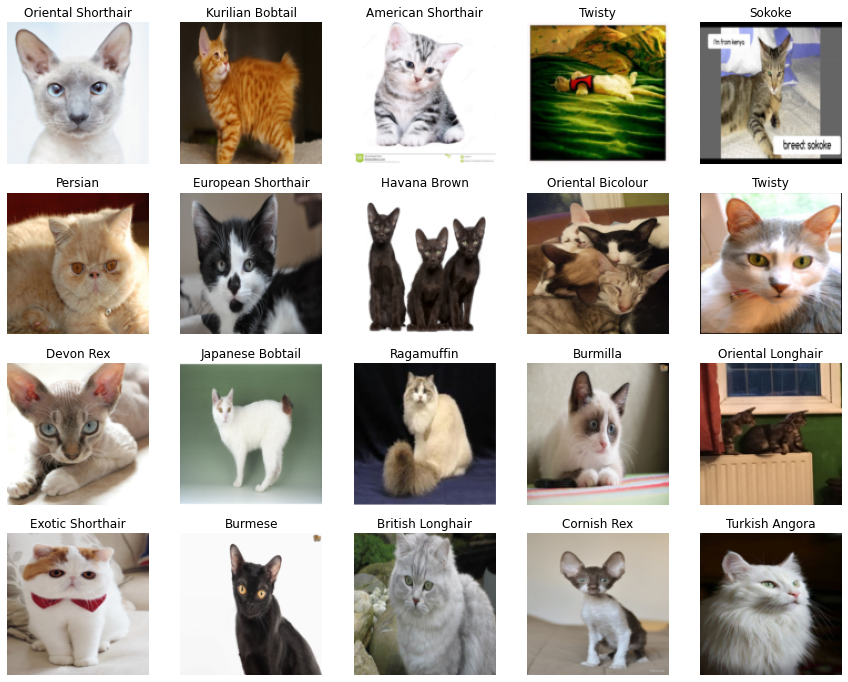

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=20, nrows=4)

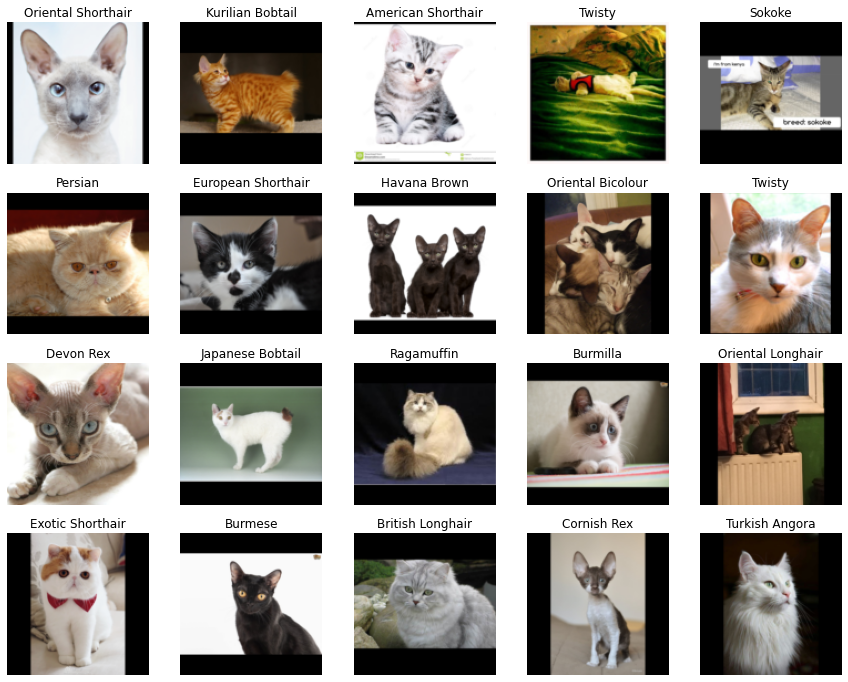

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=20, nrows=4)

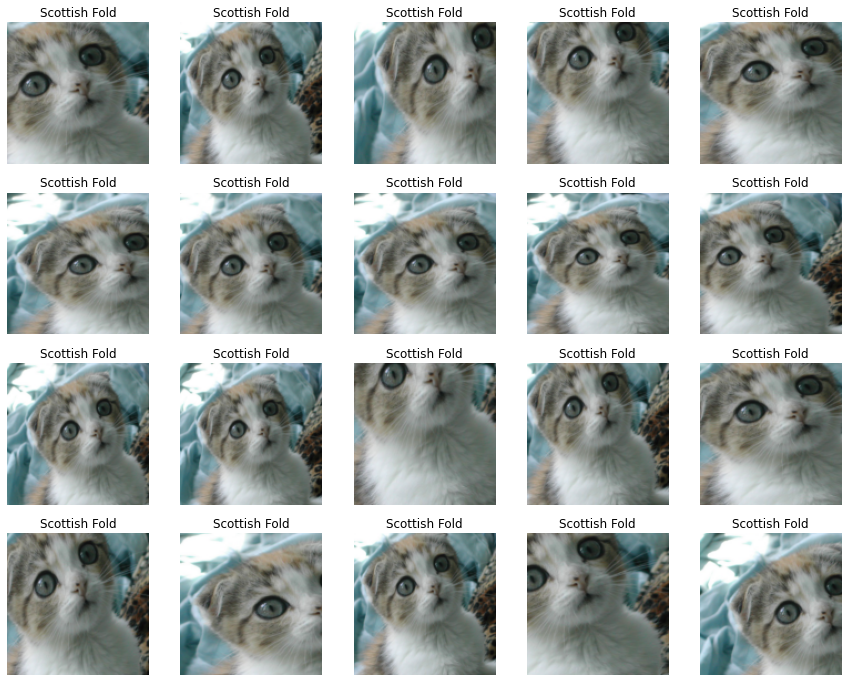

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=20, nrows=4, unique=True)

### Data Augmentation

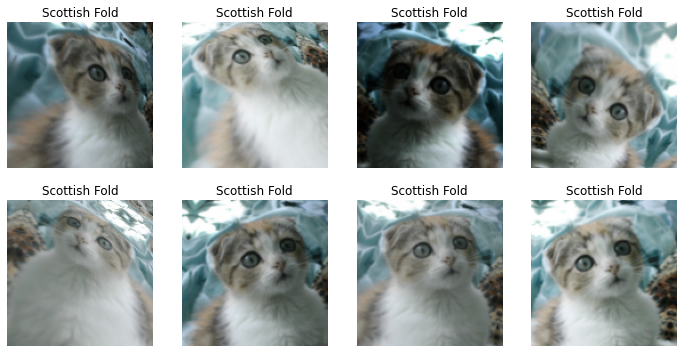

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)
# ??cnn_learner

NameError: ignored

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


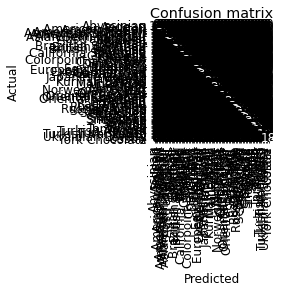

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

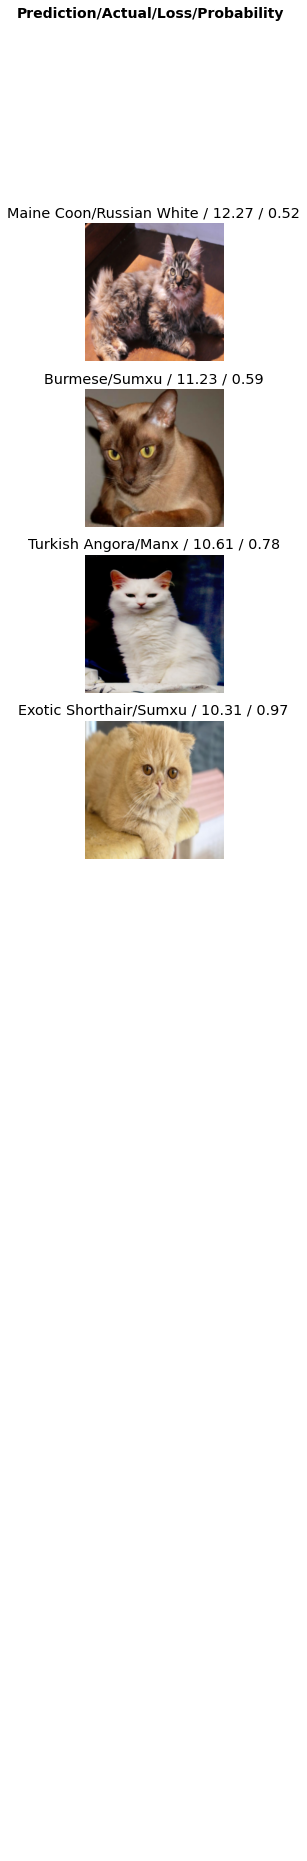

In [ ]:
interp.plot_top_losses(4, nrows=10)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'cat_breed_export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpg')

In [ ]:
learn_inf.dls.vocab

### Creating a Notebook App from the Model

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable voila —sys-prefix

### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.